In [61]:
import re
import nltk
import numpy as np
from matplotlib import pylab as plt

s_doc_word = np.load("p2_data/science2k-doc-word.npy")
s_word_doc = np.load("p2_data/science2k-word-doc.npy")
s_titles = None
s_vocab = None

with open('p2_data/science2k-titles.txt') as f:
    s_titles = f.readlines()
with open('p2_data/science2k-vocab.txt') as f:
    s_vocab = f.readlines()

print('science2k-doc-word shape: {0}'.format(s_doc_word.shape))
print('science2k-word-doc shape: {0}'.format(s_word_doc.shape))

s_titles = np.array(s_titles)
s_vocab = np.array(s_vocab)

science2k-doc-word shape: (1373L, 5476L)
science2k-word-doc shape: (5476L, 1373L)


In [62]:
"""
Part 2.A
"""
from sklearn.cluster import KMeans

xvals = []
yvals = []
kmeans_arr = []

for k in xrange(2,21):
    print('Calculating k-means for k={0}'.format(k))
    xvals.append(k)
    kmeans = KMeans(n_clusters=k).fit(s_doc_word)
    kmeans_arr.append(kmeans)
    yvals.append(kmeans.inertia_)

Calculating k-means for k=2
Calculating k-means for k=3
Calculating k-means for k=4
Calculating k-means for k=5
Calculating k-means for k=6
Calculating k-means for k=7
Calculating k-means for k=8
Calculating k-means for k=9
Calculating k-means for k=10
Calculating k-means for k=11
Calculating k-means for k=12
Calculating k-means for k=13
Calculating k-means for k=14
Calculating k-means for k=15
Calculating k-means for k=16
Calculating k-means for k=17
Calculating k-means for k=18
Calculating k-means for k=19
Calculating k-means for k=20


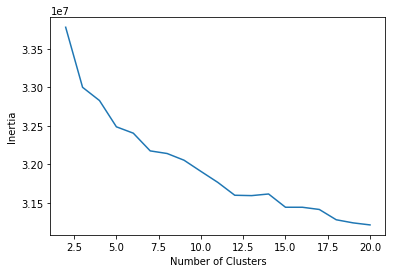

In [63]:
plt.clf()
plt.plot(xvals, yvals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [78]:
def get_docs_words_from_center(center, center_label, data, data_labels, docs):
    data_subset = []
    for i in xrange(len(data)):
        if data_labels[i] == center_label:
            data_subset.append((np.linalg.norm(center - data[i]), i))
    data_subset.sort(key=lambda t: t[0])
    
    ret = []
    set_used = s_titles if docs else s_vocab
    for i in xrange(10):
        ret.append(set_used[data_subset[i][1]])
    return ret

km = kmeans_arr[2]

avg_x_docword = s_doc_word.mean(0)
cluster_index = 0
for center in km.cluster_centers_:
    dif = center - avg_x_docword
    dif_tuples = []
    for ind in xrange(len(dif)):
        dif_tuples.append((dif[ind], ind))
    dif_tuples.sort(key=lambda t: t[0], reverse=True)
    
    print('\r\nTop words for cluster {0}:'.format(cluster_index))
    for i in xrange(10):
        word = s_vocab[dif_tuples[i][1]]
        print(word)
    
    print('\r\nClosest docs for cluster {0}:'.format(cluster_index))
    docs = get_docs_words_from_center(center, cluster_index, s_doc_word, km.labels_, True)
    for d in docs:
        print(d)
        
    cluster_index += 1



Top words for cluster 0:
fig

values

temperature

shows

range

observed

reports

surface

measured

lower


Closest docs for cluster 0:
"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"

"Nitric Acid Trihydrate (NAT) in Polar Stratospheric Clouds"

"Subducted Seamount Imaged in the Rupture Zone of the 1946 Nankaido Earthquake"

"Population Dynamical Consequences of Climate Change for a Small Temperate Songbird"

"A Monoclinic Post-Stishovite Polymorph of Silica in the Shergotty Meteorite"

"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"

"Crossing the Hopf Bifurcation in a Live Predator-Prey System"

"Earth's Enigmatic Interface"

"Ambipolar Pentacene Field-Effect Transistors and Inverters"

"Reconstruction of the Amazon Basin Effective Moisture Availability over the past 14,000 Years"


Top words for cluster 1:
problem

human

information

development

genetic

new

developed

approach

early

particular


Closest docs for cluster 1:
"T

In [65]:
"""
Part 2.B
"""
xvals = []
yvals = []
kmeans_arr_v2 = []
for k in xrange(2,21):
    print('Calculating k-means for k={0}'.format(k))
    xvals.append(k)
    kmeans = KMeans(n_clusters=k).fit(s_word_doc)
    kmeans_arr_v2.append(kmeans)
    yvals.append(kmeans.inertia_)

Calculating k-means for k=2
Calculating k-means for k=3
Calculating k-means for k=4
Calculating k-means for k=5
Calculating k-means for k=6
Calculating k-means for k=7
Calculating k-means for k=8
Calculating k-means for k=9
Calculating k-means for k=10
Calculating k-means for k=11
Calculating k-means for k=12
Calculating k-means for k=13
Calculating k-means for k=14
Calculating k-means for k=15
Calculating k-means for k=16
Calculating k-means for k=17
Calculating k-means for k=18
Calculating k-means for k=19
Calculating k-means for k=20


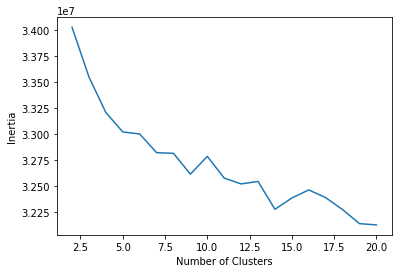

In [69]:
plt.clf()
plt.plot(xvals, yvals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [82]:
km_v2 = kmeans_arr_v2[3]

avg_x_worddoc = s_word_doc.mean(0)
cluster_index = 0
for center in km_v2.cluster_centers_:
    dif = center - avg_x_worddoc
    dif_tuples = []
    for ind in xrange(len(dif)):
        dif_tuples.append((dif[ind], ind))
    dif_tuples.sort(key=lambda t: t[0], reverse=True)
    
    print('\r\nTop docs for cluster {0}:'.format(cluster_index))
    for i in xrange(10):
        word = s_titles[dif_tuples[i][1]]
        print(word)
        
    print('\r\nClosest words for cluster {0}'.format(cluster_index))
    words = get_docs_words_from_center(center, cluster_index, s_word_doc, km_v2.labels_, False)
    for w in words:
        print(w)
    cluster_index += 1
    


Top docs for cluster 0:
"Advances in the Physics of High-Temperature Superconductivity"

"The Atom-Cavity Microscope: Single Atoms Bound in Orbit by Single Photons"

"Quantum Criticality: Competing Ground States in Low Dimensions"

"Orbital Physics in Transition-Metal Oxides"

"Negative Poisson's Ratios for Extreme States of Matter"

"Self-Mode-Locking of Quantum Cascade Lasers with Giant Ultrafast Optical Nonlinearities"

"The Galactic Center: An Interacting System of Unusual Sources"

"The Formation and Early Evolution of the Milky Way Galaxy"

"NEAR at Eros: Imaging and Spectral Results"

"Earth's Core and the Geodynamo"


Closest words for cluster 0
excitations

coherence

resonant

anisotropic

fermi

anisotropy

doped

conduction

semiconductor

dipole


Top docs for cluster 1:
"Noxa, a BH3-Only Member of the Bcl-2 Family and Candidate Mediator of p53-Induced Apoptosis"

"Positional Syntenic Cloning and Functional Characterization of the Mammalian Circadian Mutation tau"

"Centr